<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера V2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Привет ещё раз!

У тебя изначально была очень хорошая, качественная работа, так что я особо не сомневался, что этот проект для тебя не затянется, и сейчас принимаю его. Спасибо, что отнёсся к моим комментариям с должным вниманием, с тобой приятно было работать! :)
<br />
    </font>
</div>

<div class="alert alert-info">
<font size="4"><b>Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
    Привет, Дима! Спасибо, что прислал задание :) <br>Меня зовут Никита Сон и я буду проверять твой проект. Предлагаю обращаться друг к другу на ты, как это принято в Практикуме, если ты не против. Но если хочешь на Вы - не буду возражать 🙂
        
Поехали 🚀
    <br />

Мои комментарии обозначены пометкой <b>Комментарий ревьюера</b>. При внесении правок в проект, пожалуйста, не меняй и не удаляй их т.к. дальнейшая проверка будет происходить в том числе на основе того, исправлены замечания в комментариях или нет. Зато ты всегда можешь оставить свои комментарии для меня :)
    </font>
</div>

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
В зелёных блоках будут позитивные комментарии
<br />
    </font>
</div>

<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
В жёлтых - некритичные замечания
    </font>
</div>

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
В красных - важные замечания, которые надо обязательно устранить
    </font>
</div>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
В синих с пиццей - различные нейтральные сообщения, советы на будещее и прочее.
    </font>
</div>



<div class="alert alert-info">
<font size="4">🙇<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Спасибо большое за ревью
    </font>
</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Импрортируем необходимые библиотеки


In [1]:
import sys
!{sys.executable} -m pip install lightgbm

import lightgbm as lgb


import datetime
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_predict,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.utils import resample, shuffle

## Подготовка данных

### Открываем файл

In [2]:
try:
    data = pd.read_csv('/datasets/autos.csv', parse_dates=[0,-1,-4])
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv', parse_dates=[0,-1,-4])

### Предварительное изучение данных

Для начала рассмотрим как вообще представлены данные.

<div class="alert alert-info">
<font size="4">🙇<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Добивил как переменную
    </font>
</div>

In [3]:
RANDOM_STATE = 12345

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера V2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
👍
<br />
    </font>
</div>

In [4]:
data.sample(10 ,random_state=RANDOM_STATE)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
18734,2016-04-04 13:36:58,16900,bus,2010,auto,150,viano,150000,4,gasoline,mercedes_benz,no,2016-04-04,0,60326,2016-04-05 12:18:31
141787,2016-03-07 17:57:08,15500,other,2011,manual,143,1er,40000,5,gasoline,bmw,no,2016-03-07,0,35083,2016-04-06 20:19:15
37523,2016-03-24 09:37:02,3600,sedan,2004,manual,125,astra,150000,12,petrol,opel,no,2016-03-24,0,13627,2016-03-24 10:38:57
194192,2016-03-15 09:49:03,8990,sedan,2007,auto,224,c_klasse,150000,9,gasoline,mercedes_benz,no,2016-03-15,0,58135,2016-03-18 02:17:06
110210,2016-03-29 23:43:52,2500,other,1994,manual,68,transporter,150000,9,gasoline,volkswagen,no,2016-03-29,0,24598,2016-04-02 12:45:46
63295,2016-03-07 12:55:48,11000,wagon,2010,auto,177,5er,150000,10,gasoline,bmw,no,2016-03-07,0,6237,2016-04-04 02:16:33
299143,2016-03-24 17:48:59,1200,small,2003,NaN,58,clio,150000,3,petrol,renault,no,2016-03-24,0,25551,2016-03-24 17:48:59
236634,2016-03-27 09:57:43,12500,convertible,1977,auto,177,sl,150000,5,petrol,mercedes_benz,no,2016-03-27,0,53177,2016-03-27 10:38:40
44603,2016-04-02 18:38:59,1599,NaN,2016,manual,50,arosa,125000,10,NaN,seat,no,2016-04-02,0,2991,2016-04-06 18:16:10
251416,2016-03-20 23:53:52,1999,small,2002,manual,75,corsa,150000,1,petrol,opel,NaN,2016-03-20,0,46537,2016-03-21 04:41:29


<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Настоятельно тебе рекомендую рандом стейт (и другие глобальные константы) в начале работы сохранять в отдельную переменную и оперировать дальше ей. Иногда бывает нужно провести эксперимент с другим рандомом и менять по коду во всех местах где он испоьзуется явно хуже, чем одну переменную в начале поменять.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

In [6]:
print(f'Формат данных \n {data.shape[1]} колонок;\n {data.shape[0]} строк.')

Формат данных 
 16 колонок;
 354369 строк.


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
RegistrationYear,354369.0,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
Power,354369.0,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
Kilometer,354369.0,128211.172535,37905.341530,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,354369.0,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
NumberOfPictures,354369.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PostalCode,354369.0,50508.689087,25783.096248,1067.0,30165.0,49413.0,71083.0,99998.0


In [8]:
data.isna().sum().T

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

**Выводы по предварительному изучению данных**

- 16 признаков и 350000+ объектов, что является относительно большим количество информации для обработки, из чего следует, что потребуется более оптимизированные модели обучения;
- имеются некоторые аномальные данные: минимальная цена автомобиля 0 евро, максимальный год продажи 9999, месяц регистрации нулевой;
- Количество фотографий является рудементарным признакам, поскольку для всех он является нулём;
- Имеется значительное количество пропусков в признаках 
- Названия признаков не имеют классический змеиный регистр
- Дата регистрации разделена на два отдельных признаков

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
И добавить нечего, основные важные моменты предварительного анализа описаны верно
<br />
    </font>
</div>

### Описание признаков

**Признаки:**

- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

**Целевой признак**
- Price — цена (евро)

Для начала хотелось бы привести названия признаков к привычному змеиному регистру

In [9]:
data.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [10]:
data.columns = ['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type', 'brand',
       'repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen']

In [11]:
data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

С этим разобрались

### Подготовка данных

#### Неинформативные признаки

Как можно было заметить ранее, все данные в признаке количества фотографий имеет одно и тоже значение

In [12]:
data['number_of_pictures'].unique()

array([0], dtype=int64)

In [13]:
data.drop(columns = 'number_of_pictures', inplace=True)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Разумно
<br />
    </font>
</div>

In [14]:
data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'postal_code', 'last_seen'],
      dtype='object')

#### Аномалии в данных

In [15]:
data.price.describe()

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64

Минимальная цена продажи является - 0 евро. Цена продажи является целевым признаком, поэтому аномалии в ней недопустимы. 

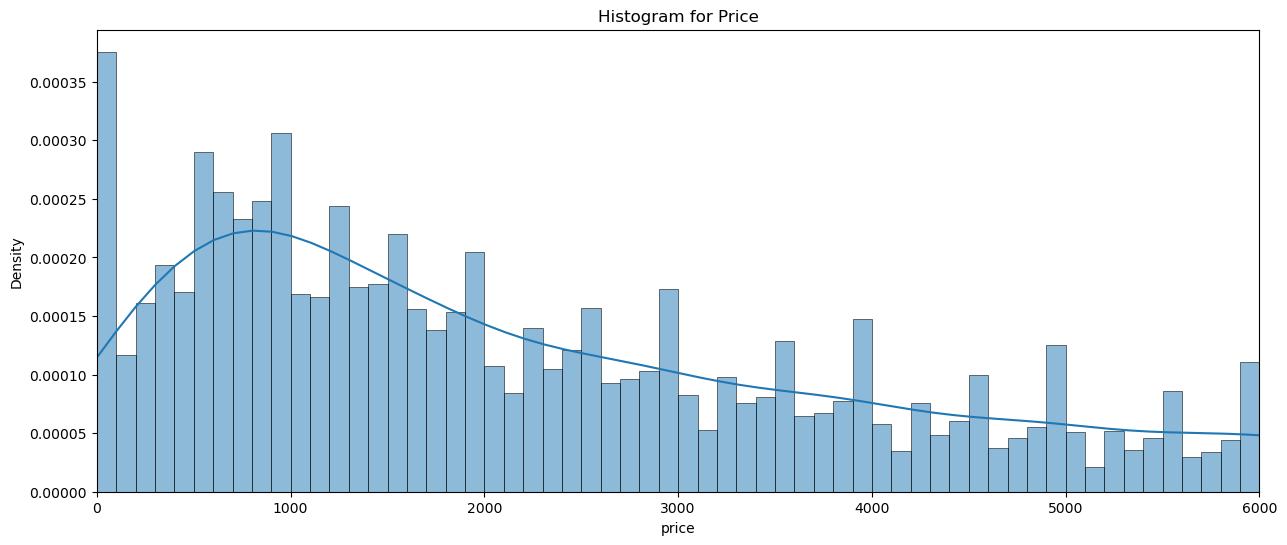

In [16]:
plt.figure(figsize=(15,6))
ax = sns.histplot(data['price'], stat='density', kde=True, bins=200).set(title='Histogram for Price', xlim=(0, 6000))
plt.show()

Можно заметить скачки в гистограмме около цен имеющих красивую цену вроде 1000, 2000, 3000 итд.

In [17]:
data.query('price==0')['price'].count()

10772

In [18]:
data.query('price==0').sample(10, random_state=RANDOM_STATE)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,postal_code,last_seen
96605,2016-03-30 19:53:52,0,NaN,2016,NaN,136,NaN,5000,0,NaN,volkswagen,NaN,2016-03-30,26607,2016-03-30 19:53:52
197339,2016-03-07 00:42:29,0,NaN,2017,manual,0,mondeo,150000,6,NaN,ford,no,2016-03-06,17235,2016-03-12 15:44:38
106637,2016-03-15 17:47:05,0,wagon,2001,auto,231,5er,150000,4,petrol,bmw,NaN,2016-03-15,66869,2016-03-15 17:47:05
234810,2016-03-21 16:42:06,0,wagon,1999,manual,115,astra,150000,6,petrol,opel,NaN,2016-03-21,66953,2016-04-06 15:45:02
157956,2016-03-25 20:06:23,0,NaN,2016,manual,60,clio,80000,0,petrol,renault,yes,2016-03-25,56459,2016-03-25 20:06:23
201963,2016-03-25 10:37:40,0,NaN,2000,NaN,0,NaN,5000,0,NaN,volkswagen,NaN,2016-03-25,59514,2016-04-02 11:47:50
115152,2016-03-11 21:56:06,0,NaN,2015,NaN,0,NaN,5000,0,NaN,audi,NaN,2016-03-11,65620,2016-03-13 13:32:27
93883,2016-03-30 16:57:16,0,sedan,1998,manual,125,a3,150000,4,petrol,audi,yes,2016-03-30,85250,2016-04-07 07:45:14
323444,2016-04-04 12:45:23,0,small,2007,manual,225,corsa,150000,5,petrol,opel,NaN,2016-04-04,35085,2016-04-06 13:45:20
192279,2016-03-27 12:55:41,0,NaN,2018,NaN,0,twingo,150000,0,NaN,renault,NaN,2016-03-27,47138,2016-03-30 17:45:41


Никакой зависимости в данных не прослеживается, поэтому можно просто отбросить

In [19]:
data.drop(data.query('price==0').index, inplace=True)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Жаль, конечно, что за такую цену машину не купить. Ну а ты всё правильно сделал.
<br />
    </font>
</div>

In [20]:
data.price.describe()

count    343597.000000
mean       4555.121974
std        4515.058553
min           1.000000
25%        1200.000000
50%        2890.000000
75%        6500.000000
max       20000.000000
Name: price, dtype: float64

Хотя минимальная цена в 1 евро немного лучше, но все равно данное значение не будет интересно пользователю в качестве предложенной

На сайте [auto.ru](https://auto.ru/moskva/cars/used/?sort=price-asc), минимальная цена продажи автомобиля является 18,000 рублей. Будем отталкиваться от неё.

In [21]:
EURO_RATE = 85
MINIMAL_PRICE_IN_RUBLES = 18_000
data.drop(data.query('price < @MINIMAL_PRICE_IN_RUBLES/ @EURO_RATE').index, inplace=True)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Интересное исследование, неплохое!
<br />
    </font>
</div>

**Следующим признаком рассмотрим мощность машины**

In [22]:
data.power.describe()

count    334895.000000
mean        112.418564
std         187.210095
min           0.000000
25%          72.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

В соответствии со [статьёй о самых мощных машинах](https://www.arenda-auto.ru/news/samye-moshchnye-avtomobili-v-mire.html#:~:text=%D0%A7%D0%B5%D0%BC%D0%BF%D0%B8%D0%BE%D0%BD%D0%BE%D0%BC%20%D1%81%D1%87%D0%B8%D1%82%D0%B0%D0%B5%D1%82%D1%81%D1%8F%20%D0%B0%D0%BC%D0%B5%D1%80%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9%20%D0%BA%D0%B0%D1%80%D1%8C%D0%B5%D1%80%D0%BD%D1%8B%D0%B9%20%D1%81%D0%B0%D0%BC%D0%BE%D1%81%D0%B2%D0%B0%D0%BB,%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%B0%2C%20%D0%BC%D0%BE%D1%89%D0%BD%D0%BE%D1%81%D1%82%D1%8C%D1%8E%204000%20%D0%BB%D0%BE%D1%88%D0%B0%D0%B4%D0%B8%D0%BD%D1%8B%D1%85%20%D1%81%D0%B8%D0%BB.) от 2017 года, самой высокой мощностью для существующих машин является 4000 лошадиных сил, для легковых это 3000. Поэтому любые значения больше 4000 является невозможными

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
И снова интересное исследование!
<br />
    </font>
</div>

In [23]:
data.query('power > 4000')

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,postal_code,last_seen
7661,2016-04-02 19:25:25,1499,small,1999,manual,7515,lupo,150000,4,petrol,volkswagen,NaN,2016-04-02,65830,2016-04-06 11:46:49
25232,2016-03-28 19:57:39,10900,bus,2009,manual,10520,caddy,150000,6,gasoline,volkswagen,no,2016-03-28,36272,2016-04-07 02:47:02
33952,2016-03-09 11:37:03,3740,small,2006,manual,6920,aygo,90000,10,NaN,toyota,no,2016-03-09,94116,2016-03-17 05:16:32
44520,2016-03-10 22:37:21,2500,convertible,1998,manual,7512,golf,150000,6,NaN,volkswagen,NaN,2016-03-10,68239,2016-04-05 15:17:50
45053,2016-04-07 07:36:38,15800,convertible,2014,auto,10218,fortwo,30000,3,petrol,smart,NaN,2016-04-06,81373,2016-04-07 07:36:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339642,2016-03-07 16:58:44,600,sedan,2000,manual,10110,focus,125000,12,petrol,ford,NaN,2016-03-07,35066,2016-03-07 17:41:33
341066,2016-04-03 22:57:04,449,NaN,2016,manual,4507,corsa,150000,4,petrol,opel,no,2016-04-03,29525,2016-04-06 00:16:11
341320,2016-03-29 21:40:33,1899,other,2006,manual,7518,berlingo,125000,11,petrol,citroen,yes,2016-03-29,89428,2016-03-31 15:17:03
346639,2016-03-25 12:55:36,1300,sedan,2000,manual,12512,carisma,150000,9,petrol,mitsubishi,NaN,2016-03-25,42105,2016-04-06 14:44:53


In [24]:
data.drop(data.query('power > 4000').index, inplace=True)

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
А есть ли статья о самых слабомощных машинах, рассказывающая о том, есть ли машины мощностью 0?)

<div class="alert alert-info">
<font size="4">🙇<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Убрал
    </font>
</div>

In [25]:
data.drop(data.query('power == 0').index, inplace=True)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера V2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
👍
<br />
    </font>
</div>

In [26]:
data.power.describe()

count    301789.000000
mean        122.002402
std          67.452531
min           1.000000
25%          77.000000
50%         112.000000
75%         150.000000
max        3500.000000
Name: power, dtype: float64

<div class="alert alert-info">
<font size="4">🙇<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
    </font>
</div>

Согласно [статье с Autodmb](https://automdb.com/min_power) машины с одной лошадиной силой существуют

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера V2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Хотел бы я на такое посмотреть :)
<br />
    </font>
</div>

**Дальше рассмотрим даты**

In [27]:
data.registration_year.describe()

count    301789.000000
mean       2003.570180
std          30.358731
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

In [28]:
data['last_seen'].max()

Timestamp('2016-04-07 14:58:51')

Самый последний возможный год - 2016, всё что больше является невозможным

In [29]:
data.drop(data.query('registration_year > 2016').index, inplace=True)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Абсолютно прав, год выгрузки базы 2016
<br />
    </font>
</div>

In [30]:
data.registration_year.value_counts().sort_index().head(20)

1000    3
1234    1
1400    1
1500    1
1600    1
1800    4
1910    6
1923    2
1927    1
1928    1
1929    4
1930    2
1931    1
1932    1
1933    1
1935    2
1936    1
1937    5
1938    4
1940    1
Name: registration_year, dtype: int64

In [31]:
data.drop(data.query('registration_year < 1900').index, inplace=True)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Снова разумный ход!
<br />
    </font>
</div>

Мы рассмотрели год, но что касается месяца?

In [32]:
sorted(data.registration_month.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [33]:
data.query('registration_month == 0')['registration_month'].count()

16690

In [34]:
data.query('registration_month == 12')['registration_month'].count()

20990

И "нулевого" месяца много так и "двенадцатого", так что это не простая единичная опечатка. 

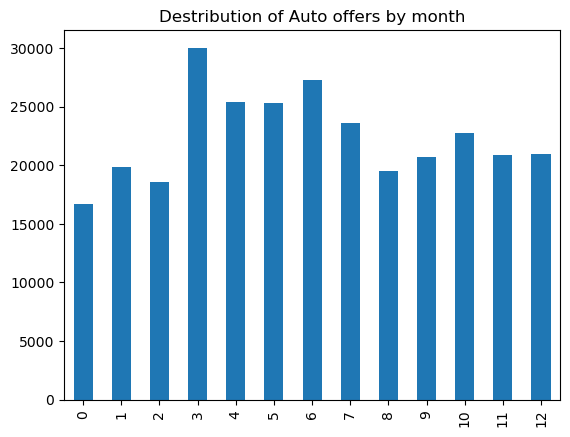

In [35]:
data.registration_month.value_counts().sort_index().plot(kind='bar', title='Destribution of Auto offers by month')
plt.show()

Можно было бы объединить "0" и "1" месяц, но в таков случае у них вместе взятых будет практически в два раза больше, чем у всех других месяцев. Поэтому придется оставить так.

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
И снова ты прав в своих действиях, тут логичнее всего оставить как есть. 0 - судя по всему просто пропущенное значение.
<br />
    </font>
</div>

In [36]:
data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'postal_code', 'last_seen'],
      dtype='object')

#### Проверка на явные дубликаты

In [37]:
data[data.duplicated(keep=False)]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,postal_code,last_seen
41529,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18,36391,2016-03-18 18:46:15
88087,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08,89518,2016-03-09 09:46:57
90964,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28,66589,2016-03-28 08:46:21
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08,89518,2016-03-09 09:46:57
187735,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03,75196,2016-04-07 09:44:54
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18,36391,2016-03-18 18:46:15


Полное совпадение разных заявлений с точностью до секунды является крайне маловероятным, поэтому дубликаты будет лучше отбросить

In [38]:
data.drop_duplicates(inplace=True)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
👍
<br />
    </font>
</div>

#### Проверка на неявные дубликаты

Посмотрим есть ли неявные дубликаты в категориальных данных

In [39]:
data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'postal_code', 'last_seen'],
      dtype='object')

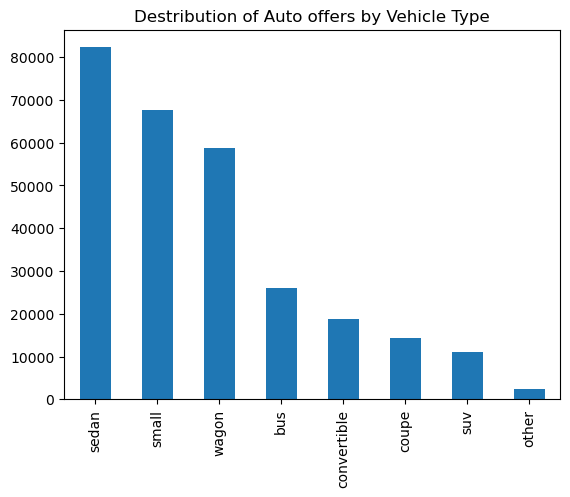

In [40]:
data.vehicle_type.value_counts().plot(kind='bar', title='Destribution of Auto offers by Vehicle Type')
plt.show()

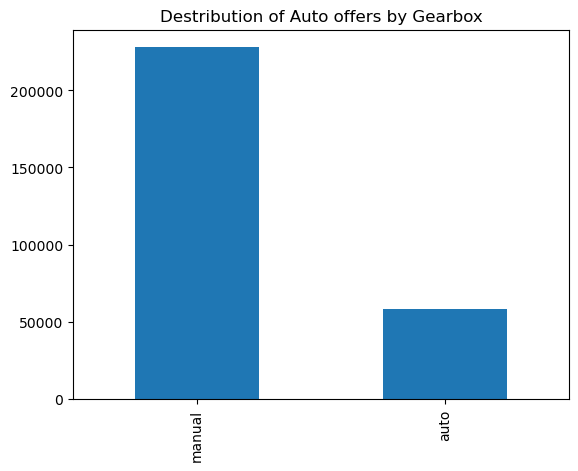

In [41]:
data.gearbox.value_counts().plot(kind='bar', title='Destribution of Auto offers by Gearbox')
plt.show()

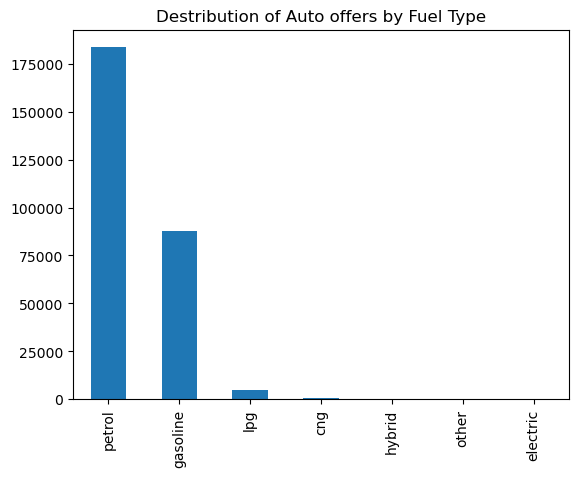

In [42]:
data.fuel_type.value_counts().plot(kind='bar', title='Destribution of Auto offers by Fuel Type')
plt.show()

In [43]:
data.model.unique()

array([nan, 'grand', 'golf', 'fabia', '3er', '2_reihe', 'c_max',
       '3_reihe', 'passat', 'navara', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'arosa', 'other', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'one', 'fortwo', '1er',
       'b_klasse', 'a8', 'jetta', 'fiesta', 'c_klasse', 'micra', 'vito',
       'sprinter', '156', 'escort', 'forester', 'xc_reihe', 'scenic',
       'ka', 'a1', 'focus', 'a4', 'tt', 'astra', 'a6', 'jazz', 'omega',
       'slk', '7er', 'combo', 'corsa', '80', '147', 'z_reihe', 'sorento',
       'ibiza', 'mustang', 'eos', 'touran', 'getz', 'insignia', 'almera',
       'megane', 'a3', 'lupo', 'r19', 'caddy', 'mondeo', 'cordoba',
       'colt', 'impreza', 'vectra', 'berlingo', 'tiguan', '6_reihe', 'c4',
       'panda', 'up', 'i_reihe', 'ceed', 'kangoo', '5_reihe', 'yeti',
       'octavia', 'zafira', 'mii', 'rx_reihe', '6er', 'modus', 'fox',
       'matiz', 'beetle', 'rio', 'touareg', 'logan', 'spider', 'cuore',
       's_m

In [44]:
sorted(data.brand.unique())

['alfa_romeo',
 'audi',
 'bmw',
 'chevrolet',
 'chrysler',
 'citroen',
 'dacia',
 'daewoo',
 'daihatsu',
 'fiat',
 'ford',
 'honda',
 'hyundai',
 'jaguar',
 'jeep',
 'kia',
 'lada',
 'lancia',
 'land_rover',
 'mazda',
 'mercedes_benz',
 'mini',
 'mitsubishi',
 'nissan',
 'opel',
 'peugeot',
 'porsche',
 'renault',
 'rover',
 'saab',
 'seat',
 'skoda',
 'smart',
 'sonstige_autos',
 'subaru',
 'suzuki',
 'toyota',
 'trabant',
 'volkswagen',
 'volvo']

Похоже что у категориальных признаков нет неявных дубликатов

<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Но это не точно. Есть подозрение, что petrol и gasoline - это и то и другое бензин.

<div class="alert alert-info">
<font size="4">🙇<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Исправил
    </font>
</div>

In [45]:
data.fuel_type = data.fuel_type.replace('gasoline', 'petrol')

#### Обработка пропусков

In [46]:
data.isna().sum()

date_crawled              0
price                     0
vehicle_type          10159
registration_year         0
gearbox                5049
power                     0
model                 10767
kilometer                 0
registration_month        0
fuel_type             14644
brand                     0
repaired              41136
date_created              0
postal_code               0
last_seen                 0
dtype: int64

In [47]:
data[data.vehicle_type.isna()].sample(10, random_state=RANDOM_STATE)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,postal_code,last_seen
49493,2016-03-12 21:38:17,6300,NaN,2007,manual,90,one,90000,5,NaN,mini,no,2016-03-12,47441,2016-03-20 01:45:42
186565,2016-03-12 07:54:52,2299,NaN,1994,auto,299,a8,150000,11,NaN,audi,no,2016-03-12,54666,2016-03-21 20:20:41
137404,2016-03-07 17:51:13,550,NaN,2016,manual,120,other,5000,6,NaN,rover,no,2016-03-07,22527,2016-03-11 09:47:10
313009,2016-04-04 15:57:59,1900,NaN,2016,manual,90,golf,5000,3,petrol,volkswagen,NaN,2016-04-04,28199,2016-04-06 18:17:04
98774,2016-03-20 07:56:23,3999,NaN,2016,manual,105,getz,150000,12,petrol,hyundai,no,2016-03-20,72221,2016-04-06 09:45:52
135697,2016-04-02 18:37:41,1199,NaN,2016,manual,60,corsa,150000,7,NaN,opel,NaN,2016-04-02,54411,2016-04-06 18:16:04
257957,2016-03-09 00:51:59,2150,NaN,2016,manual,150,m_klasse,150000,6,NaN,mercedes_benz,NaN,2016-03-08,44803,2016-03-15 00:16:38
341782,2016-03-29 19:55:09,250,NaN,2016,manual,60,ibiza,150000,0,petrol,seat,NaN,2016-03-29,97714,2016-04-02 08:44:32
144903,2016-03-19 20:55:12,4500,NaN,2000,manual,150,3er,150000,1,petrol,bmw,NaN,2016-03-19,85399,2016-04-07 10:17:46
180752,2016-03-07 15:41:31,450,NaN,2016,manual,75,astra,150000,4,NaN,opel,yes,2016-03-07,55743,2016-03-08 12:15:24


Пропуски только в категориальных типах данных, их можно заполнить в таком случае `NaN`

In [48]:
data.fillna('NaN', inplace=True)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Разумно
<br />
    </font>
</div>

In [49]:
data.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometer             0
registration_month    0
fuel_type             0
brand                 0
repaired              0
date_created          0
postal_code           0
last_seen             0
dtype: int64

#### Проверка на взаимосвязанные параметры

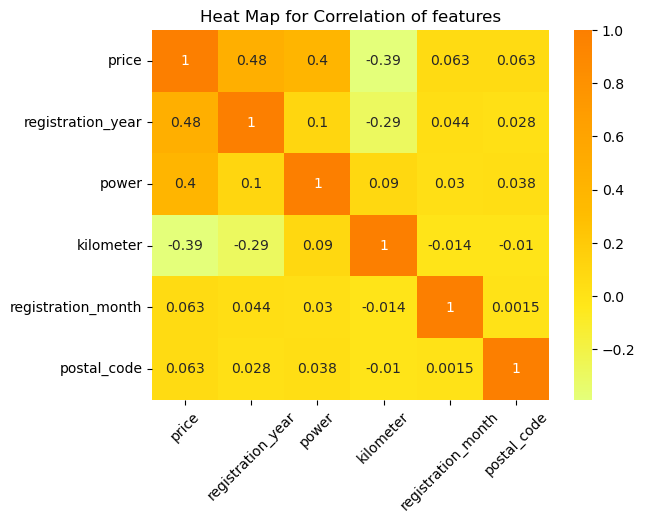

In [50]:
corr = data.corr()
ax = sns.heatmap(corr, cmap = 'Wistia', annot= True)
ax.title.set_text('Heat Map for Correlation of features')
plt.xticks(rotation=45)
plt.show()

Похоже, что нет сильной взаимосвязи между параметрами

### Изменение типов данных

Для работы с моделями придется изменить типы данных


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291580 entries, 1 to 354368
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        291580 non-null  datetime64[ns]
 1   price               291580 non-null  int64         
 2   vehicle_type        291580 non-null  object        
 3   registration_year   291580 non-null  int64         
 4   gearbox             291580 non-null  object        
 5   power               291580 non-null  int64         
 6   model               291580 non-null  object        
 7   kilometer           291580 non-null  int64         
 8   registration_month  291580 non-null  int64         
 9   fuel_type           291580 non-null  object        
 10  brand               291580 non-null  object        
 11  repaired            291580 non-null  object        
 12  date_created        291580 non-null  datetime64[ns]
 13  postal_code         291580 no

In [52]:
data.loc[:, data.dtypes == 'object'] = data.loc[:, data.dtypes == 'object'].astype('category')

#### Метод separate_date

In [53]:
#def separate_date(data, column_name, date_type, only_date):
#    data[date_type+'_day'] = data[column_name].dt.day
#    data[date_type+'_month'] = data[column_name].dt.month
#    data[date_type+'_year'] = data[column_name].dt.year
#    if not only_date:
#        data[date_type+'_hours'] = data[column_name].dt.hour
#        data[date_type+'_minutes'] = data[column_name].dt.minute
#        data[date_type+'_seconds'] = data[column_name].dt.second
#    data.drop(columns=column_name, inplace=True)

In [54]:
#separate_date(data, 'date_crawled', 'crawled', False)
#separate_date(data, 'date_created', 'created', True)
#separate_date(data, 'last_seen', 'last_seen', False)

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Подход интересный, но разве эти признаки несут пользу в предсказании стоимости автомобиля? Как и почтовый индекс

<div class="alert alert-info">
<font size="4">🙇<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Исправил
    </font>
</div>

In [55]:
data.drop(columns=['date_crawled', 'date_created', 'last_seen', 'postal_code'], inplace=True)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера V2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
👍
<br />
    </font>
</div>

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291580 entries, 1 to 354368
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               291580 non-null  int64   
 1   vehicle_type        291580 non-null  category
 2   registration_year   291580 non-null  int64   
 3   gearbox             291580 non-null  category
 4   power               291580 non-null  int64   
 5   model               291580 non-null  category
 6   kilometer           291580 non-null  int64   
 7   registration_month  291580 non-null  int64   
 8   fuel_type           291580 non-null  category
 9   brand               291580 non-null  category
 10  repaired            291580 non-null  category
dtypes: category(6), int64(5)
memory usage: 15.3 MB


### Подготовка выборок

#### Метод split_data

In [57]:
def split_data(data, column_name):
    # 1st we separate data for features and target data
    features = data.loc[:,data.columns != column_name]
    target = data[column_name]
    # 2rd we separate data for testing and training samples
    features_train, features_test, target_train, target_test =\
    train_test_split(
            features,
            target,
            train_size=0.7,
            random_state=RANDOM_STATE
    )
    return features_train, features_test, target_train, target_test

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Размеры выборок адекватные
<br />
    </font>
</div>

In [58]:
features_train, features_test, target_train, target_test = split_data(data, 'price')

## Обучение моделей

>Обучите разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуйте разные гиперпараметры.

В соответствии с заданием в качестве первой модели будет выбрана LightGBM

In [59]:
%%time
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

#boosting_train = lgb.Dataset(features_train, label=target_train)
#n_estimators = 100

#boosting_model = lgb.train(params, boosting_train, n_estimators)

#indexes_of_categories = [features_train.columns.get_loc(col) for col in features_train.columns[features_train.dtypes == 'category']]
param_grid = {
    'num_leaves': [31, 127],
    'boosting_type': ['gbdt'],
    'metric': ['rmse'],
    'colsample_bytree': [0.9],
    'objective': ['rmse'],
    'subsample': [0.8],
    'learning_rate': [0.05],
    'subsample_freq': [5],
    'verbose': [-1],
    'n_estimators': [100],
    'min_child_samples': [30, 50, 100]
    }

lgb_estimator = lgb.LGBMRegressor(random_state=RANDOM_STATE)

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')
lgb_model = gsearch.fit(features_train, target_train)


Wall time: 1min 2s


<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Молодец, что не забываешь подбирать гиперпараметры и что используешь встроенное кодирование категориальных признаков LightGBM, это найлучшее решение
<br />
    </font>
</div>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />

`indexes_of_categories = [features_train.columns.get_loc(col) for col in features_train.columns[features_train.dtypes == 'category']]`

эта строчка же нигде не используется

<div class="alert alert-info">
<font size="4">🙇<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Исправил
    </font>
</div>

In [60]:
%%time
mean_squared_error(lgb_model.predict(features_test), target_test)**0.5

Wall time: 489 ms


1567.2335325966712

> Значение метрики RMSE должно быть меньше 2500.

Проходит по этому признаку

In [61]:
oec = OrdinalEncoder()
categorical_features = data.columns[data.dtypes == 'category']
oec.fit(data[categorical_features])
data[categorical_features] = oec.transform(data[categorical_features])

In [62]:
# data = pd.get_dummies(data, drop_first=True)
features_train, features_test, target_train, target_test = split_data(data, 'price')

<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Про pd.get_dummies: это как бы one hot encoding, но не совсем, потому что в машинном обучении корректная последовательность действий такова: сначала разбиваем данные, потом различные преобразования (scaler, encoder) обучаем на трейн датасете и применяем к другим. pd.get_dummies так не умеет, в отличие от <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OneHotEncoder</a> из sklearn, а в реальных задачах вполне бывают ситуации, что в тестовой выборке или новых данных попадаются некоторые категории, которых не было в трейне. Поэтому использование pd.get_dummies нежелательно. Но если ты оставишь его, я не буду отправлять проект на доработку.

Кроме этого считаю важным сказать, что большая проблема OneHotEncoder в том, что размер данных очень сильно увеличивается. Когда мы работаем с линейной моделью, других вариантов у нас нет, потому что линейные модели подбирают признакам веса, на которые те умножаются. И если мы будем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">LabelEncoder</a>, то получится ситуация, что модель будет как бы считать, что, условно, "Ниссан в 3 раза лучше чем Шкода", что вообще неправильно. Но для "деревянных" моделей это не проблема, для них Ниссан = 3, Шкода = 1, ничего не значит кроме того, что это по сути одно и то же. Поэтому для деревьев LabelEncoder предпочтительнее, чем OHE.
    </font>
</div>

<div class="alert alert-info">
<font size="4">🙇<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Исправил
    </font>
</div>

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера V2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Красавчик!
<br />
    </font>
</div>

In [63]:
%%time
rfc_estimator=RandomForestRegressor(random_state=RANDOM_STATE)
param_grid = { 
    'n_estimators': [100],
    'min_samples_leaf':[31]
#    'max_depth' : [4,5,6]
}
gsearch = GridSearchCV(estimator=rfc_estimator, param_grid=param_grid, cv= 4, scoring='neg_mean_squared_error')
rfc_model = gsearch.fit(features_train, target_train)

Wall time: 4min 54s


In [64]:
%%time
mean_squared_error(rfc_model.predict(features_test), target_test)**0.5

Wall time: 1.52 s


1749.5553464568577

LGBMRegressor работает гораздо быстрее, чем классический RandomForestRegressor

### Проверка на адекватность

Сравним модели с простой, которая просто выбирает среднее значение

In [65]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
dummy_score = mean_squared_error(dummy_regr.predict(target_test), target_test)
dummy_score ** 0.5

4601.01953090319

Похоже, что обученные модели прошли проверку на адекватность

## Заключение

| | LightGBM | RandomForestRegressor    |
|---:|:-------------|:-----------|
| Скорость обучения |Быстро  | Ужасно медленно       | 
| Скорость предсказания | Быстро  | Медленно   |
| Работа с категориальными признаками | Да  | Нет   |
| Точность предсказания | Отлично  | Хорошо   |

------

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Подведём итоги. В целом, очень добротный проект. Но маленечко доработать нужно.

1. Удалить аномалии мощности не только сверху, но и снизу

2. Чуть почистить признаки, убрать неинформативные по своей сути

Кажется, что это мелочи и проблем возникнуть не должно. Из необязательного было бы здорово, если бы ты с pd.get_dummies перешёл к sklearn OHE или, что лучше, OrdinalEncoder

<div class="alert alert-info">
<font size="4">🙇<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Ещё раз спасибо за ревью, Ваши комментарии были очень полезны
    </font>
</div>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера V2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Спасибо, приятно слышать :)

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей